In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

### Load Data

In [47]:
def load_data(flepath, well_names_col, well_name, prod_col_name, date_col_name):
    df = pd.read_excel(flepath, parse_dates=True)
    
    df = df[df[well_names_col] == well_name][[date_col_name, prod_col_name]]
    
    df.columns = ["date", "production"]
    
    return df

In [48]:
df = load_data('Volve production data.xlsx', 'NPD_WELL_BORE_NAME', '15/9-F-14', 'BORE_OIL_VOL', 'DATEPRD')
df.head()

,date,production
4967,2008-02-12,0.0
4968,2008-02-13,0.0
4969,2008-02-14,0.0
4970,2008-02-15,0.0
4971,2008-02-16,0.0


In [49]:
assert len(df.columns) == 2 , "make sure your dataframe has only 2 columns"
assert list(df.columns) == ["date", "production"], "make sure your dataframe has columns named 'date' and 'production'"

<Axes: xlabel='date'>

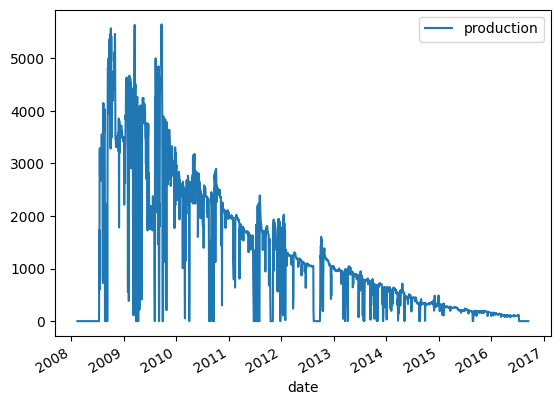

In [50]:
df.plot(x="date", y="production")

### Remove the outliers

In [51]:
def remove_outliers(df, col_name="production"):
    
    df = df[df[col_name] != 0]
    
    return df

In [52]:
df_removed = remove_outliers(df)
df_removed.head()

,date,production
5118,2008-07-13,1735.26
5119,2008-07-14,592.36
5120,2008-07-15,2532.21
5121,2008-07-16,3030.71
5122,2008-07-17,3288.08


In [53]:
assert len(df_removed) != len(df), "make sure you removed the outliers"

### Data Smoothing

In [54]:
def smooth(df, col_name="production", window_size=100):
    
    df[col_name+"_smoothed"] = df[col_name].rolling(window=window_size, center=True).mean()
    
    df = df.dropna()
    
    return df

In [55]:
df_smoothed = smooth(df_removed, "production", window_size=100)
df_smoothed.head()

C:\Users\Hary Capri\AppData\Local\Temp\ipykernel_24176\64648518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name+"_smoothed"] = df[col_name].rolling(window=window_size, center=True).mean()


,date,production,production_smoothed
5179,2008-09-13,4925.62,3809.6498
5180,2008-09-14,4963.82,3829.6124
5181,2008-09-15,4970.38,3858.4468
5182,2008-09-16,4982.77,3867.7339
5183,2008-09-17,5003.65,3872.0095


ValueError: keyword grid_alpaha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

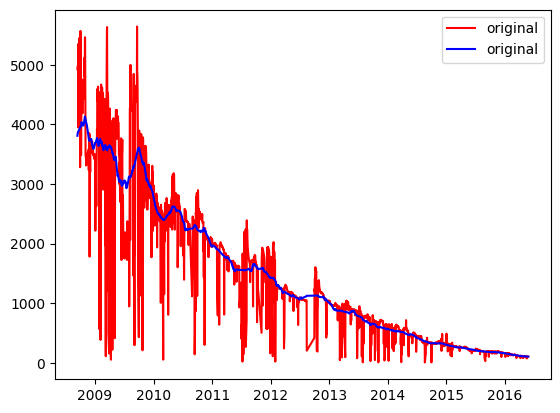

In [56]:
plt.plot(df_smoothed["date"], df_smoothed["production"], label="original", color="red")
plt.plot(df_smoothed["date"], df_smoothed["production_smoothed"], label="original", color="blue")

plt.legend(loc="upper right")

plt.grid(which="major", color="#6666", linestyle="-", alpaha=.5)
plt.grid(which="minor", color="#9999", linestyle="-", alpha=.1)

plt.minorticks_on()


In [57]:
assert len(df_removed) != len(df_smoothed)
assert list(df.columns) == ["date", "production", "production_smoothed"]

AssertionError: 